# Geospatial examples

## Chapter 7 — Los Angeles data

### URL examples to get census data

In [1]:
import sys
sys.version

'3.10.12 (main, Aug 18 2023, 17:39:47) [Clang 14.0.3 (clang-1403.0.22.14.1)]'

In [2]:
import pandas as pd
import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# url = 'https://api.census.gov/data/2019/acs/acs1/profile?get=NAME,DP03_0001E&for=metropolitan%20statistical%20area/micropolitan%20statistical%20area:*'
url = 'https://api.census.gov/data/2010/dec/sf1?get=LSAD_NAME,P001001&for=tract:*&in=state:06'

In [4]:
# df = pd.read_json(url)

# df.columns = df.loc[0]
# df = df.drop(0)
# df

#### The boook uses a very roundabout way of getting the same data

I suggest you use the `read_json` method above.

In [5]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [6]:
# The built out request for the URL  https://api.census.gov/data/2010/dec/sf1?get=LSAD_NAME,P001001&for=tract:*&in=state:06
HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset])
predicates = {}
get_vars = ["LSAD_NAME", "P001001"]
predicates["get"] = ",".join(get_vars)
predicates["for"] = "tract:*"
predicates["in"] = "state:06"
r = requests.get(base_url, params=predicates, verify=False)

In [7]:
# Create user friendly column names
tract_name = ["tract_name", "tract_pop", "state_fips", "county_fips", "tract_fips"]
# Reading the json into pandas df
tractdf = pd.DataFrame(columns=tract_name, data=r.json()[1:])
# Changing data types to integer
tractdf["tract_pop"] = tractdf["tract_pop"].astype(int)

tractdf

,tract_name,tract_pop,state_fips,county_fips,tract_fips
0,Census Tract 4340.04,2796,06,037,434004
1,Census Tract 4600,4851,06,037,460000
2,Census Tract 4602,5315,06,037,460200
3,Census Tract 4603.01,4638,06,037,460301
4,Census Tract 4603.02,4442,06,037,460302
...,...,...,...,...,...
8052,Census Tract 1541,3729,06,097,154100
8053,Census Tract 1542.01,3925,06,097,154201
8054,Census Tract 38.04,6450,06,099,003804
8055,Census Tract 38.05,2667,06,099,003805


In [8]:
# !wget ftp://ftp2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip

In [6]:
import os

ftp_path = 'ftp://ftp2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_06_tract.zip'
dest_path = 'data/tl_2019_06_tract.zip'

if not os.path.exists(dest_path):
    import urllib.request
    urllib.request.urlretrieve(ftp_path, dest_path)

In [4]:
import geopandas as gpd

In [16]:
import zipfile

archive = zipfile.ZipFile(dest_path, 'r')
archive.extractall('data')

<AxesSubplot: >

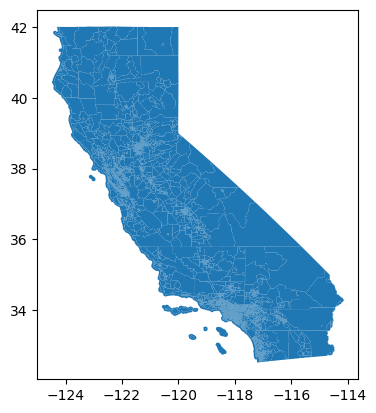

In [17]:
ca_tracts = gpd.read_file('data/tl_2019_06_tract.shp')
# ca_tracts = ca_tracts.loc[ca_tracts.STATEFP=='06'].copy()
ca_tracts.plot()

In [11]:
onecounty_tractdf = tractdf.loc[
    tractdf['county_fips'] == '037'].copy(
)
onecounty_tractdf

,tract_name,tract_pop,state_fips,county_fips,tract_fips
0,Census Tract 4340.04,2796,06,037,434004
1,Census Tract 4600,4851,06,037,460000
2,Census Tract 4602,5315,06,037,460200
3,Census Tract 4603.01,4638,06,037,460301
4,Census Tract 4603.02,4442,06,037,460302
...,...,...,...,...,...
7739,Census Tract 9302,546,06,037,930200
7740,Census Tract 9303.01,886,06,037,930301
7762,Census Tract 9304.01,2471,06,037,930401
7763,Census Tract 9800.01,0,06,037,980001


In [12]:
onecounty_tractdf['tract_fips'] = onecounty_tractdf['tract_fips'].str.ljust(6,'0')
onecounty_tractdf['geoid'] = (
    onecounty_tractdf['state_fips'] +
    onecounty_tractdf['county_fips'] + 
    onecounty_tractdf['tract_fips']
)
onecounty_tractdf

,tract_name,tract_pop,state_fips,county_fips,tract_fips,geoid
0,Census Tract 4340.04,2796,06,037,434004,06037434004
1,Census Tract 4600,4851,06,037,460000,06037460000
2,Census Tract 4602,5315,06,037,460200,06037460200
3,Census Tract 4603.01,4638,06,037,460301,06037460301
4,Census Tract 4603.02,4442,06,037,460302,06037460302
...,...,...,...,...,...,...
7739,Census Tract 9302,546,06,037,930200,06037930200
7740,Census Tract 9303.01,886,06,037,930301,06037930301
7762,Census Tract 9304.01,2471,06,037,930401,06037930401
7763,Census Tract 9800.01,0,06,037,980001,06037980001


In [13]:
onecounty_tractdf.count()

tract_name     2346
tract_pop      2346
state_fips     2346
county_fips    2346
tract_fips     2346
geoid          2346
dtype: int64

In [14]:
ca_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 58 entries, 8 to 3179
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   58 non-null     object  
 1   COUNTYFP  58 non-null     object  
 2   COUNTYNS  58 non-null     object  
 3   GEOID     58 non-null     object  
 4   NAME      58 non-null     object  
 5   NAMELSAD  58 non-null     object  
 6   LSAD      58 non-null     object  
 7   CLASSFP   58 non-null     object  
 8   MTFCC     58 non-null     object  
 9   CSAFP     31 non-null     object  
 10  CBSAFP    45 non-null     object  
 11  METDIVFP  7 non-null      object  
 12  FUNCSTAT  58 non-null     object  
 13  ALAND     58 non-null     int64   
 14  AWATER    58 non-null     int64   
 15  INTPTLAT  58 non-null     object  
 16  INTPTLON  58 non-null     object  
 17  geometry  58 non-null     geometry
dtypes: geometry(1), int64(2), object(15)
memory usage: 8.6+ KB


In [15]:
attr_joined = pd.merge(
    ca_tracts, 
    onecounty_tractdf, 
    left_on='GEOID', 
    right_on='geoid')
# Check that all 2345 Census Tracts joined
attr_joined.count()

STATEFP        0
COUNTYFP       0
COUNTYNS       0
GEOID          0
NAME           0
NAMELSAD       0
LSAD           0
CLASSFP        0
MTFCC          0
CSAFP          0
CBSAFP         0
METDIVFP       0
FUNCSTAT       0
ALAND          0
AWATER         0
INTPTLAT       0
INTPTLON       0
geometry       0
tract_name     0
tract_pop      0
state_fips     0
county_fips    0
tract_fips     0
geoid          0
dtype: int64

In [16]:
import folium as fm

In [17]:
center_x = (ca_tracts.bounds.minx.mean() + ca_tracts.bounds.maxx.mean())/2
center_y = (ca_tracts.bounds.miny.mean() + ca_tracts.bounds.maxy.mean())/2

map = fm.Map(location=[center_y, center_x], zoom_start=10)

In [18]:
# Add Study Area Block Groups to Map
fm.Choropleth(
   geo_data = attr_joined,
   data=attr_joined,
   columns=['tract_pop','ALAND'],
   key_on= 'feature.properties.tract_pop',
   fill_color='YlGnBu',
   name = 'Population Density',
   legend_name='Population Density'
).add_to(map)
map